# **SIN 393 – Introduction to Computer Vision (2024)**

# Lecture 01 - Part 3 - Image classification - Color features

Prof. João Fernando Mari ([*joaofmari.github.io*](https://joaofmari.github.io/))

---

## Importing the required libraries
---

In [27]:
import os

import numpy as np
from skimage import util, transform, filters, color, measure, morphology, io, exposure
from sklearn import model_selection, neighbors, metrics, preprocessing

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### %matplotlib notebook
### %matplotlib widget

## The dataset 
---
* Flowers detection dataset:

In [28]:
# 3 classes - 50 images in these classes
ds_path = 'data/flowers_toy'

# 3 classes - 6 images per class
#### ds_path = 'data/flowers_toy2'

### ***** Rename files. Only run the first time *****

In [29]:
# ***** Rename files. Only run the first time *****

# # Iterate along the classes of the dataset
# for classe in classes_list:
#     # Listagem de todas as imagens na pasta daquela classe
#     filename_list = os.listdir(os.path.join(ds_path, classe))
#     filename_list.sort()
    
#     # # Iterate through the files in the current folder
#     for i, filename in enumerate(filename_list):
#         os.rename(os.path.join(ds_path, classe, filename), 
#                   os.path.join(ds_path, classe, f'{classe}{i:03}.{filename.split(".")[-1]}'))

## Loading the images from the dataset

In [30]:
# List of folders in the 'ds_path' directory (class names)
classes_list = os.listdir(ds_path)

# List of images in the dataset
image_list = []
# List of image labels
label_list = []

# List of image filenames
filename_list_ = []

# Iterate through the dataset classes
for classe in classes_list:
    
    # List all images in the current class folder
    filename_list = os.listdir(os.path.join(ds_path, classe))

    filename_list.sort()
    
    # Iterate through the files in the current folder
    for filename in filename_list:
        # Load the image
        img_temp = plt.imread(os.path.join(ds_path, classe, filename))
        
        # Resize the image to 64 x 64
        img_temp = transform.resize(img_temp, (64, 64), anti_aliasing=True)
        
         # Add the image to the image list
        image_list.append(img_temp)
        
        # Add the image label to the label list
        label_list.append(classe)
        
        # Add the image filename to a list (for visualization purposes)
        filename_list_.append(filename)

In [31]:
label_list = np.array(label_list)

# Lista com os rótulos das imagens        
print(label_list)

['daisy' 'daisy' 'daisy' 'daisy' 'daisy' 'daisy' 'daisy' 'daisy' 'daisy'
 'daisy' 'daisy' 'daisy' 'daisy' 'daisy' 'daisy' 'daisy' 'daisy' 'daisy'
 'daisy' 'daisy' 'daisy' 'daisy' 'daisy' 'daisy' 'daisy' 'daisy' 'daisy'
 'daisy' 'daisy' 'daisy' 'daisy' 'daisy' 'daisy' 'daisy' 'daisy' 'daisy'
 'daisy' 'daisy' 'daisy' 'daisy' 'daisy' 'daisy' 'daisy' 'daisy' 'daisy'
 'daisy' 'daisy' 'daisy' 'daisy' 'daisy' 'rose' 'rose' 'rose' 'rose'
 'rose' 'rose' 'rose' 'rose' 'rose' 'rose' 'rose' 'rose' 'rose' 'rose'
 'rose' 'rose' 'rose' 'rose' 'rose' 'rose' 'rose' 'rose' 'rose' 'rose'
 'rose' 'rose' 'rose' 'rose' 'rose' 'rose' 'rose' 'rose' 'rose' 'rose'
 'rose' 'rose' 'rose' 'rose' 'rose' 'rose' 'rose' 'rose' 'rose' 'rose'
 'rose' 'rose' 'rose' 'rose' 'rose' 'rose' 'sunflower' 'sunflower'
 'sunflower' 'sunflower' 'sunflower' 'sunflower' 'sunflower' 'sunflower'
 'sunflower' 'sunflower' 'sunflower' 'sunflower' 'sunflower' 'sunflower'
 'sunflower' 'sunflower' 'sunflower' 'sunflower' 'sunflower' 'sunflow

### Plotting the dataset images

* Plotting the N first images for each class.
* Important to start understanding the dataset.

In [32]:
# Select only the first N images from each class
image_list_temp = []
filename_list_temp = []

# Iterate through the number of classes
for i, class_name in enumerate(classes_list):
### for i in range(3):
    print(i, classes_list[i])
    # The first 6 occurrences where label_list matches class_name
    image_list_temp += [image_list[j] for j in np.where(label_list==classes_list[i])[0][:6]]
    filename_list_temp += [filename_list_[j] for j in np.where(label_list==classes_list[i])[0][:6]]

0 daisy
1 rose
2 sunflower


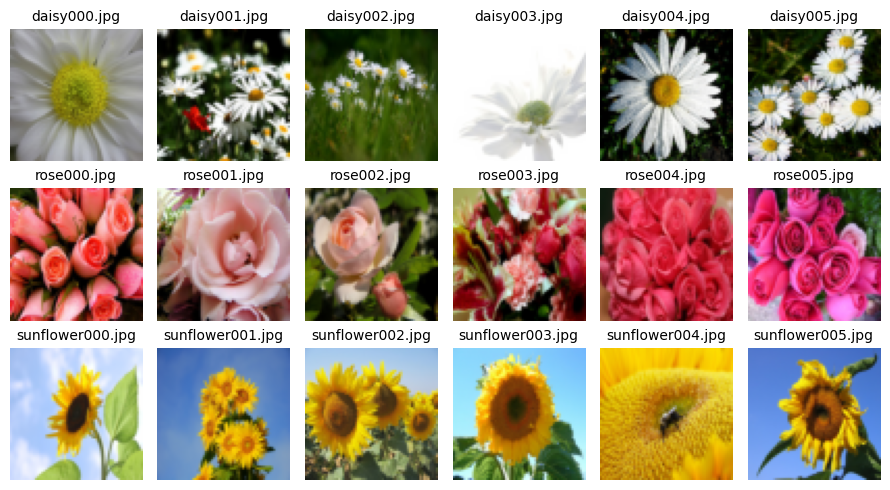

In [33]:
fig, ax  = plt.subplots(3, 6, figsize=(9, 5))

for i, (image, filename) in enumerate(zip(image_list_temp, filename_list_temp)):
    ax[i//6, i%6].imshow(image, vmin=0, vmax=255)
    ax[i//6, i%6].set_title(str(filename), fontsize=10)
    ax[i//6, i%6].axis('off')

fig.tight_layout()
plt.show()

## Extracting some color based features from images
----

In [34]:
# 2D array with the image features
# Each row stores information about an image. Each column stores one feature.
feature_mat = []

# Number of histogram bins
n_bins = 32

for i, (image, label) in enumerate(zip(image_list, label_list)):
    # DEBUG
    print('Image {} - class {}'.format(i, label))
    
    # Convert the image data type to float
    # img_float = util.img_as_float(image)
    img_float = image

    # Compute the histogram for each channel
    hist_r = exposure.histogram(img_float[:,:,0], nbins=n_bins)[0]
    hist_g = exposure.histogram(img_float[:,:,1], nbins=n_bins)[0]
    hist_b = exposure.histogram(img_float[:,:,2], nbins=n_bins)[0]

    # Concatenate the histograms into a single feature vector
    feat_hist = np.concatenate((hist_r, hist_g, hist_b))
    ### print(feat_hist)

    # Append the feature vector to the feature matrix
    feature_mat.append(feat_hist)

Image 0 - class daisy
Image 1 - class daisy
Image 2 - class daisy
Image 3 - class daisy
Image 4 - class daisy
Image 5 - class daisy
Image 6 - class daisy
Image 7 - class daisy
Image 8 - class daisy
Image 9 - class daisy
Image 10 - class daisy
Image 11 - class daisy
Image 12 - class daisy
Image 13 - class daisy
Image 14 - class daisy
Image 15 - class daisy
Image 16 - class daisy
Image 17 - class daisy
Image 18 - class daisy
Image 19 - class daisy
Image 20 - class daisy
Image 21 - class daisy
Image 22 - class daisy
Image 23 - class daisy
Image 24 - class daisy
Image 25 - class daisy
Image 26 - class daisy
Image 27 - class daisy
Image 28 - class daisy
Image 29 - class daisy
Image 30 - class daisy
Image 31 - class daisy
Image 32 - class daisy
Image 33 - class daisy
Image 34 - class daisy
Image 35 - class daisy
Image 36 - class daisy
Image 37 - class daisy
Image 38 - class daisy
Image 39 - class daisy
Image 40 - class daisy
Image 41 - class daisy
Image 42 - class daisy
Image 43 - class dais

In [35]:
# Convert the feature list to a NumPy array
feature_mat = np.array(feature_mat)

# Shape of the feature_map.
# Each row is a sample (image), and each column is a feature.
print(feature_mat.shape)

(150, 96)


In [36]:
# Some statistics about the feature set
with np.printoptions(precision=4, suppress=True):
    print('Histogram minimum values:')
    print(feature_mat.min(0))
    print('Histogram maximum values:')
    print(feature_mat.max(0))
    print('Histogram mean values:')
    print(feature_mat.mean(0))
    print('Histogram standard deviation values:')
    print(feature_mat.std(0))

Histogram minimum values:
[ 1  0  2  2  1  3  0  0  1  2  2  5  7  7  6  7  9 10 13 13 15 10 12 16
 22 20 17 21  5  5  1  1  1  1  1  3  3  1  0  0  1  2  8  4  7  7  8  6
 12 17 17 20 10 12  7  6  3  5  3  1  0  0  0  1  3  3  7  5  9  4  9 10
  6  9  7  5  3  5  4  3  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  1]
Histogram maximum values:
[2953 1094  584  596  593  559  495  455  385  816  874  423  987  512
  344  326  414  285  386  438  466  439  442  552  548  536  508  494
  452  466  557 2295 2960 1257  697  450  414  412  381  447  460  545
 1370  484  433  380  404  441  407  526  811  623 1307  489  431  981
  936  564  449  478  510  405  622 2266 3114 1396  872 1052 1226  722
  709  617  414  377  394  294  288  298  285  273  279  283  379  332
  351  358  322  407  561  399  860  725  832  694 1256 2241]
Histogram mean values:
[183.9267 116.28   121.2267 129.4    125.4333 116.0267 115.18   113.
 113.1733 108.04   108.1     99.7533 102.4667 101.5     98.04    99.74
 101

### Plotting the computed features

In [37]:
# Select only the first N images from each class
feature_mat_temp = []
filename_list_temp = []


### for i in range(3):
# Iterate through the number of classes
for i, class_name in enumerate(classes_list):
    # The first 3 occurrences where the label matches 'class_name'
    feature_mat_temp += [feature_mat[j] for j in np.where(label_list==classes_list[i])[0][:3]]
    filename_list_temp += [filename_list_[j] for j in np.where(label_list==classes_list[i])[0][:3]]

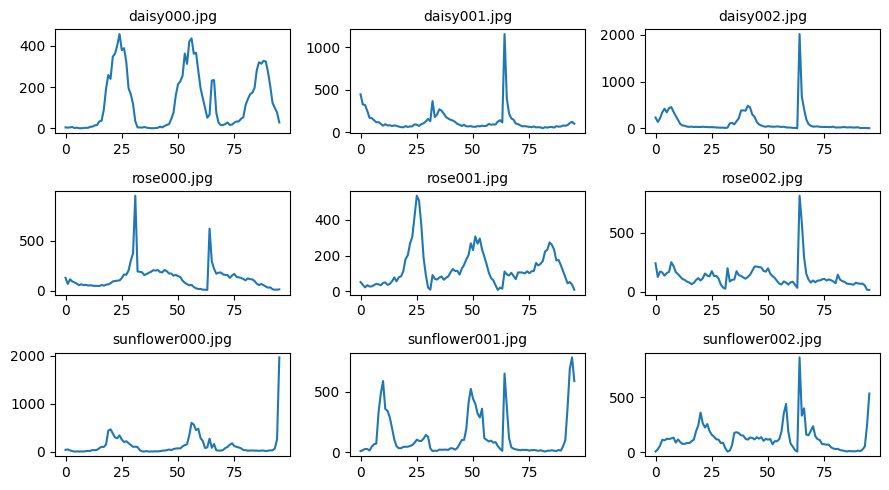

In [38]:
fig, ax  = plt.subplots(3, 3, figsize=(9, 5))

for i, (feature, filename) in enumerate(zip(feature_mat_temp, filename_list_temp)):
    ## ax[i//6, i%6].imshow(image, vmin=0, vmax=255)
    ax[i//3, i%3].plot(feature)
    ax[i//3, i%3].set_title(str(filename), fontsize=10)
    ### ax[i//6, i%6].axis('off')

fig.tight_layout()
plt.show()

## Cross-validation - Hold-out
---


In [39]:
# We used all features for training
feature_mat_ok = feature_mat

In [40]:
# Split 20% of the full dataset for TESTING and 80% for Training 1.
X_train_1, X_test, y_train_1, y_test, file_train_1, file_test = model_selection.train_test_split(feature_mat_ok, 
                                                                                                 label_list, 
                                                                                                 filename_list_,
                                                                                                 test_size=0.2, 
                                                                                                 stratify=label_list,
                                                                                                 random_state=42)

In [41]:
# Split 25% of Training Set 1 for validation.
#   -> This is equivalent to 20% of the full dataset. 0.2 / 0.8 = 0.25
X_train_2, X_val, y_train_2, y_val, file_train_2, file_val = model_selection.train_test_split(X_train_1, 
                                                                                              y_train_1, 
                                                                                              file_train_1,
                                                                                              test_size=0.25, 
                                                                                              stratify=y_train_1,
                                                                                              random_state=42)

In [42]:
print(len(X_train_2))
print(len(X_val))
print(len(X_test))

90
30
30


## Feature normalization
---

In [43]:
# Mean of the features in the training set
X_train_2_mean = X_train_2.mean(0)

# Standard deviation of the features in the training set
X_train_2_std = X_train_2.std(0)

with np.printoptions(precision=4, suppress=True):
    print(X_train_2.mean(0))
    print(X_train_2.std(0))

[161.7111 119.2111 115.4778 122.2778 120.1667 112.8778 111.6    110.7667
 118.1889 116.9889 116.6444 104.3    110.2111 104.8556  98.7778  98.6444
  98.1     96.6778 103.2556 107.8778 122.7778 132.9444 137.1222 146.3
 147.6    157.6111 159.4556 156.6889 149.9111 147.3    135.4111 254.2667
 135.5556 121.2556 121.2    126.9333 133.7889 134.2    143.2111 147.5889
 146.6444 152.0444 162.0778 153.5444 144.3222 140.5111 139.0778 132.9
 131.6222 134.5111 138.2333 136.9    136.7556 131.0444 120.0889 123.7778
 122.2889 111.9667 110.0667  98.8667  89.1333  81.2111  74.8444 119.8333
 563.5667 295.1556 236.4222 209.7556 184.4222 151.7111 132.1    119.8778
 110.6667 101.3222  95.1444  90.4444  87.      83.3778  83.7889  81.7222
  80.1889  80.3333  79.1444  79.9444  81.8778  77.4     82.1333  84.9222
  85.4889  85.0778  87.8333  90.7556  99.8444  94.6111 109.8444 170.1222]
[372.1402 176.1093 121.803  120.7916 112.9859  93.2652  85.2786  83.6526
  92.6764 123.766  122.7049  78.9318 119.0844  84.1889  

In [44]:
# Normal feature transform - Standard Scaler (Manual)
# ----
# X_train_2_norm = (X_train_2 - X_train_2_mean) / X_train_2_std
# X_val_norm = (X_val - X_train_2_mean) / X_train_2_std
# X_test_norm = (X_test - X_train_2_mean) / X_train_2_std

# Normal feature transform - Standard Scaler (Sklearn)
# ----
scaler = preprocessing.StandardScaler().fit(X_train_2)
with np.printoptions(precision=4, suppress=True):
    print(f'Mean:  \t {np.array(scaler.mean_)}')
    print(f'Std. dev.: \t {np.array(scaler.scale_)}')

Mean:  	 [161.7111 119.2111 115.4778 122.2778 120.1667 112.8778 111.6    110.7667
 118.1889 116.9889 116.6444 104.3    110.2111 104.8556  98.7778  98.6444
  98.1     96.6778 103.2556 107.8778 122.7778 132.9444 137.1222 146.3
 147.6    157.6111 159.4556 156.6889 149.9111 147.3    135.4111 254.2667
 135.5556 121.2556 121.2    126.9333 133.7889 134.2    143.2111 147.5889
 146.6444 152.0444 162.0778 153.5444 144.3222 140.5111 139.0778 132.9
 131.6222 134.5111 138.2333 136.9    136.7556 131.0444 120.0889 123.7778
 122.2889 111.9667 110.0667  98.8667  89.1333  81.2111  74.8444 119.8333
 563.5667 295.1556 236.4222 209.7556 184.4222 151.7111 132.1    119.8778
 110.6667 101.3222  95.1444  90.4444  87.      83.3778  83.7889  81.7222
  80.1889  80.3333  79.1444  79.9444  81.8778  77.4     82.1333  84.9222
  85.4889  85.0778  87.8333  90.7556  99.8444  94.6111 109.8444 170.1222]
Std. dev.: 	 [372.1402 176.1093 121.803  120.7916 112.9859  93.2652  85.2786  83.6526
  92.6764 123.766  122.7049  78.93

In [45]:
X_train_2_norm = scaler.transform(X_train_2)
X_val_norm = scaler.transform(X_val)
X_test_norm = scaler.transform(X_test)

with np.printoptions(precision=4, suppress=True):
    print(f'Train: \t {X_train_2_norm.mean():.4f} ± {X_train_2_norm.std():.4f}')
    print(f'Val.: \t {X_val_norm.mean():.4f} ± {X_val_norm.std():.4f}')
    print(f'Test:   \t {X_test_norm.mean():.4f} ± {X_test_norm.std():.4f}')

Train: 	 -0.0000 ± 1.0000
Val.: 	 0.0074 ± 1.0655
Test:   	 -0.0235 ± 1.0244


## Optimizing hyperparameters in the validation set
---

In [46]:
k_list = [1, 3, 5, 7, 9]

In [47]:
# List of training accuracies
acc_train_list = []
# List of validation accuracies
acc_val_list = []

for k_ in k_list:
    # Build a K-NN classifier. K = k_
    clf = neighbors.KNeighborsClassifier(n_neighbors=k_)

    # Training the classifier
    clf.fit(X_train_2_norm, y_train_2)

    # Testing the classifier (using the validation set)
    pred = clf.predict(X_val_norm)
    acc_val = metrics.accuracy_score(y_val, pred)
    
    acc_val_list.append(acc_val)
    
    # Testing the classifier using the training set.
    # **** Just for comparison with the validation results and to check for overfitting ****
    pred_train = clf.predict(X_train_2_norm)
    acc_train = metrics.accuracy_score(y_train_2, pred_train)
    
    acc_train_list.append(acc_train)  

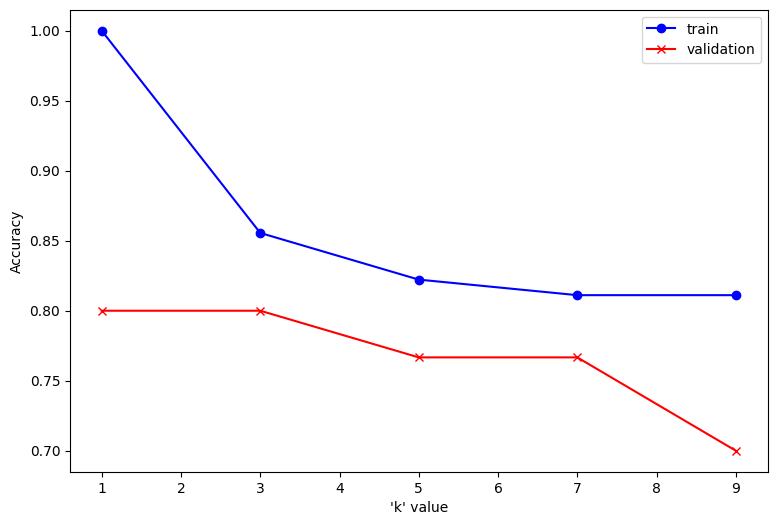

In [48]:
plt.figure(figsize=(9, 6))

plt.plot(k_list, acc_train_list, '-o', color='blue', label='train')
plt.plot(k_list, acc_val_list, '-x', color='red', label='validation')
plt.xlabel("'k' value")
plt.ylabel("Accuracy")
plt.legend(loc='best')

plt.show()

In [49]:
print('k \t Train acc. \t Val acc.')
print('----------------------------')
for k_, acc_t, acc_v in zip(k_list, acc_train_list, acc_val_list):
    print(f'{k_} \t {acc_t:.4f} \t {acc_v:.4f}')

k_best = k_list[np.argmax(acc_val_list)]
print(f'\nBest \'k\': {k_best} ({np.max(acc_val_list):.4f} acc.)')

k 	 Train acc. 	 Val acc.
----------------------------
1 	 1.0000 	 0.8000
3 	 0.8556 	 0.8000
5 	 0.8222 	 0.7667
7 	 0.8111 	 0.7667
9 	 0.8111 	 0.7000

Best 'k': 1 (0.8000 acc.)


## Evaluating the model over the test set
---

In [50]:
# Build a K-NN classifier. K = k_best
clf = neighbors.KNeighborsClassifier(n_neighbors=k_best)

# Training the classifier
clf.fit(X_train_2_norm, y_train_2)

# Testing the classifier (using the TEST set)
pred = clf.predict(X_test_norm)
acc_val = metrics.accuracy_score(y_test, pred)

### Confusion matrix and classification report

In [51]:
print('\nConfusion matrix:')
print(metrics.confusion_matrix(y_test, pred))

print('\nClassification report:')
print(metrics.classification_report(y_test, pred))


Confusion matrix:
[[8 2 0]
 [3 7 0]
 [1 0 9]]

Classification report:
              precision    recall  f1-score   support

       daisy       0.67      0.80      0.73        10
        rose       0.78      0.70      0.74        10
   sunflower       1.00      0.90      0.95        10

    accuracy                           0.80        30
   macro avg       0.81      0.80      0.80        30
weighted avg       0.81      0.80      0.80        30



### A detailed classification report

In [52]:
for i, (y_test_, pred_, filename_) in enumerate(zip(y_test, pred, file_test)):
    print(f'{i} \t {filename_} \t {y_test_} \t {pred_} \t {(y_test_ == pred_)}')

0 	 daisy038.jpg 	 daisy 	 rose 	 False
1 	 sunflower027.jpg 	 sunflower 	 sunflower 	 True
2 	 rose007.jpg 	 rose 	 rose 	 True
3 	 rose043.jpg 	 rose 	 daisy 	 False
4 	 daisy042.jpg 	 daisy 	 daisy 	 True
5 	 rose006.jpg 	 rose 	 rose 	 True
6 	 daisy022.jpg 	 daisy 	 daisy 	 True
7 	 daisy020.jpg 	 daisy 	 daisy 	 True
8 	 sunflower047.jpg 	 sunflower 	 sunflower 	 True
9 	 rose034.jpg 	 rose 	 rose 	 True
10 	 sunflower007.jpg 	 sunflower 	 sunflower 	 True
11 	 sunflower041.jpg 	 sunflower 	 sunflower 	 True
12 	 sunflower004.jpg 	 sunflower 	 sunflower 	 True
13 	 rose001.jpg 	 rose 	 rose 	 True
14 	 daisy007.jpg 	 daisy 	 daisy 	 True
15 	 daisy049.jpg 	 daisy 	 rose 	 False
16 	 daisy014.jpg 	 daisy 	 daisy 	 True
17 	 rose019.jpg 	 rose 	 rose 	 True
18 	 rose013.jpg 	 rose 	 daisy 	 False
19 	 sunflower038.jpg 	 sunflower 	 sunflower 	 True
20 	 daisy010.jpg 	 daisy 	 daisy 	 True
21 	 sunflower040.jpg 	 sunflower 	 daisy 	 False
22 	 rose008.jpg 	 rose 	 daisy 	 False
23 	

## Bibliography
---
* GONZALEZ, R.C.; WOODS, R.E. **Digital Image Processing.** 3rd ed. Pearson, 2007.
* COSTA, L. DA F.; CESAR-JR., R. M. **Shape analysis and classification: theory and practice.** CRC Press, 2000. Chapter 8.
* Scikit-image documentation.
    * https://scikit-image.org/docs/stable/
* scikit-learn - User Guide.
    * https://scikit-learn.org/stable/user_guide.html